# 3D Map

While representing the configuration space in 3 dimensions isn't entirely practical it's fun (and useful) to visualize things in 3D.

In this exercise you'll finish the implementation of `create_grid` such that a 3D grid is returned where cells containing a voxel are set to `True`. We'll then plot the result!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 16, 16

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [8]:
def create_voxmap(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    alt_min = 0
    
    print("N")
    print("min = {0}, max = {1}\n".format(north_min, north_max))
    
    print("E")
    print("min = {0}, max = {1}\n".format(east_min, east_max))
    
    print("Z")
    print("min = {0}, max = {1}".format(alt_min, alt_max))
    print()
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)
    
    # Given an interval, values outside the interval are clipped to the interval 
    # edges. For example, if an interval of [0, 1] is specified, values smaller 
    # than 0 become 0, and values larger than 1 become 1
    
    """
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i,:]
        obstacle = [
                int(np.clip((north - d_north - north_min)// voxel_size, 0, north_size-1)),
                int(np.clip((north + d_north - north_min)// voxel_size, 0, north_size-1)),
                int(np.clip((east - d_east - east_min)// voxel_size, 0, east_size-1)),
                int(np.clip((east + d_east - east_min)// voxel_size, 0, east_size-1)),
                int(alt + d_alt)//voxel_size
            ]
        """
    obst =  [[140, 150, 20, 30, 11],
             [150, 160, 20, 30, 11],
             [190, 200, 20, 30, 11],
             [200, 210, 20, 30, 11],
             [210, 220, 20, 30, 11],
             [140, 150, 30, 40, 11],
             [150, 160, 30, 40, 11],
             [160, 170, 30, 40, 11],
             [170, 180, 30, 40, 11],
             [180, 190, 30, 40, 11]]
    """
    obst [190, 200, 30, 40, 11]
    obst [200, 210, 30, 40, 11]
    obst [210, 220, 30, 40, 11]
    obst [140, 150, 40, 50, 11]
    obst [150, 160, 40, 50, 11]
    obst [160, 170, 40, 50, 11]
    obst [170, 180, 40, 50, 11]
    obst [180, 190, 40, 50, 11]
    obst [190, 200, 40, 50, 11]
    obst [200, 210, 40, 50, 11]
    obst [210, 220, 40, 50, 11]
    obst [150, 160, 50, 60, 11]
    obst [160, 170, 50, 60, 11]
    obst [210, 220, 70, 80, 11]
    obst [150, 160, 80, 90, 11]
    obst [160, 170, 80, 90, 11]
    obst [170, 180, 80, 90, 11]
    obst [180, 190, 80, 90, 11]
    obst [190, 200, 80, 90, 11]
    obst [200, 210, 80, 90, 11]
    obst [210, 220, 80, 90, 11]
    obst [150, 160, 90, 100, 11]
    obst [160, 170, 90, 100, 11]
    obst [170, 180, 90, 100, 11]
    obst [180, 190, 90, 100, 11]
    obst [190, 200, 90, 100, 11]
    obst [200, 210, 90, 100, 11]
    obst [210, 220, 90, 100, 11]
    obst [150, 160, 100, 110, 11]
    obst [160, 170, 100, 110, 11]
    obst [190, 200, 100, 110, 11]
    obst [210, 220, 100, 110, 11]
    obst [150, 160, 110, 120, 11]
    obst [160, 170, 110, 120, 11]
    obst [170, 180, 110, 120, 11]
    obst [180, 190, 110, 120, 11]
    obst [190, 200, 110, 120, 11]
    obst [200, 210, 110, 120, 11]
    """
    for obstacle in obst:
        voxmap[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3],
                0:obstacle[4]] = True

        # TODO: fill in the voxels that are part of an obstacle with `True`
        #
        # i.e. grid[0:5, 20:26, 2:7] = True

    return voxmap

Create 3D grid.

In [9]:
voxmap = create_voxmap(data, 1)
print(voxmap.shape)

N
min = -316.0, max = 605.0

E
min = -445.0, max = 476.0

Z
min = 0, max = 212.0

(921, 921, 212)


Plot the 3D grid. 

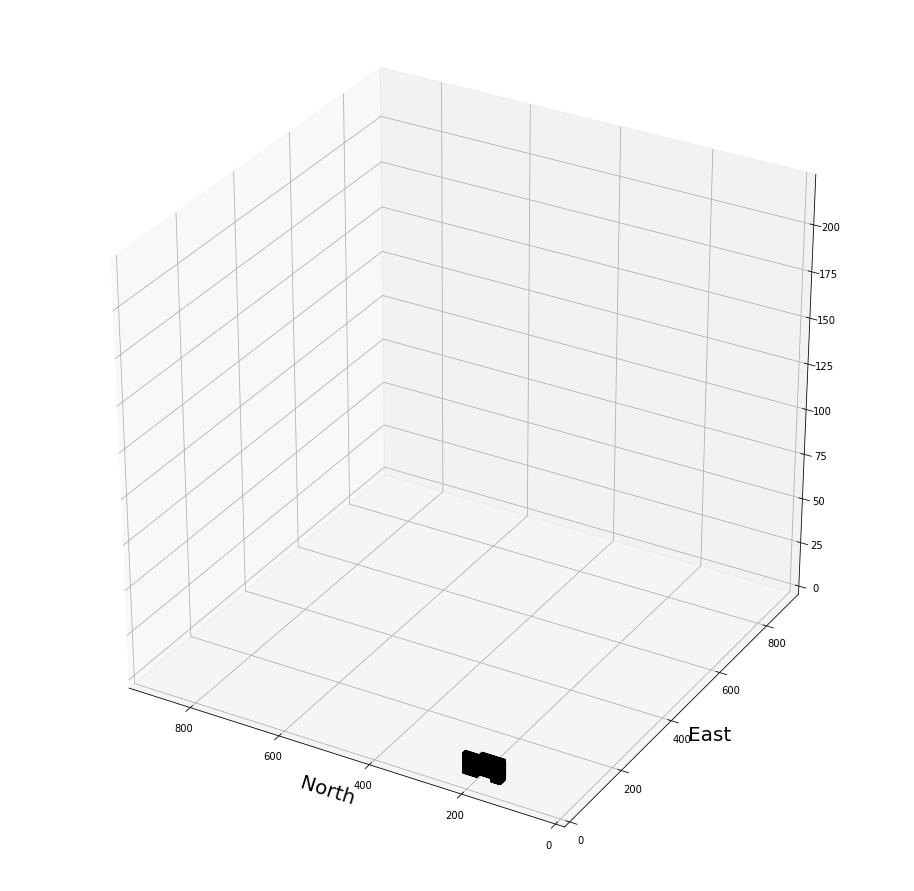

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add 100 to the height so the buildings aren't so tall
ax.set_zlim(0, voxmap.shape[2]+10)

plt.xlabel('North',fontsize = 20)
plt.ylabel('East', fontsize = 20)

plt.show()

Isn't the city pretty?

[solution](/notebooks/Voxel-Map-Solution.ipynb)